In [1]:

words = open('data/names.txt', 'r').read().splitlines()
words = [word.strip() for word in words]
print(len(words))
max_len = max(len(word) for word in words)
min_len = min(len(word) for word in words)
print(max_len, min_len)
print(words[:5])

# 生成字符序列
chars = sorted(list(set(''.join(words))))
print(len(chars))
print(chars)

# 字符映射
char2idx = {char: idx+1 for idx, char in enumerate(chars)}
idx2char = {idx: char for char, idx in char2idx.items()}
print(char2idx)
print(idx2char)


32033
15 2
['emma', 'olivia', 'ava', 'isabella', 'sophia']
26
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [2]:
import torch
# 生成(ch1, ch2) pair对，然后计算pair对累计出现的次数
char2idx['.'] = 0
idx2char[0] = '.'
N = torch.zeros(len(char2idx), len(char2idx), dtype=torch.float)

for word in words:
    word = '.' + word + '.'
    for ch1, ch2 in zip(word, word[1:]):
        idx1 = char2idx[ch1]
        idx2 = char2idx[ch2]
        N[idx1, idx2] += 1

print(N[:5])
        

tensor([[0.0000e+00, 4.4100e+03, 1.3060e+03, 1.5420e+03, 1.6900e+03, 1.5310e+03,
         4.1700e+02, 6.6900e+02, 8.7400e+02, 5.9100e+02, 2.4220e+03, 2.9630e+03,
         1.5720e+03, 2.5380e+03, 1.1460e+03, 3.9400e+02, 5.1500e+02, 9.2000e+01,
         1.6390e+03, 2.0550e+03, 1.3080e+03, 7.8000e+01, 3.7600e+02, 3.0700e+02,
         1.3400e+02, 5.3500e+02, 9.2900e+02],
        [6.6400e+03, 5.5600e+02, 5.4100e+02, 4.7000e+02, 1.0420e+03, 6.9200e+02,
         1.3400e+02, 1.6800e+02, 2.3320e+03, 1.6500e+03, 1.7500e+02, 5.6800e+02,
         2.5280e+03, 1.6340e+03, 5.4380e+03, 6.3000e+01, 8.2000e+01, 6.0000e+01,
         3.2640e+03, 1.1180e+03, 6.8700e+02, 3.8100e+02, 8.3400e+02, 1.6100e+02,
         1.8200e+02, 2.0500e+03, 4.3500e+02],
        [1.1400e+02, 3.2100e+02, 3.8000e+01, 1.0000e+00, 6.5000e+01, 6.5500e+02,
         0.0000e+00, 0.0000e+00, 4.1000e+01, 2.1700e+02, 1.0000e+00, 0.0000e+00,
         1.0300e+02, 0.0000e+00, 4.0000e+00, 1.0500e+02, 0.0000e+00, 0.0000e+00,
         8.4200e+

画图来看一下矩阵

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])


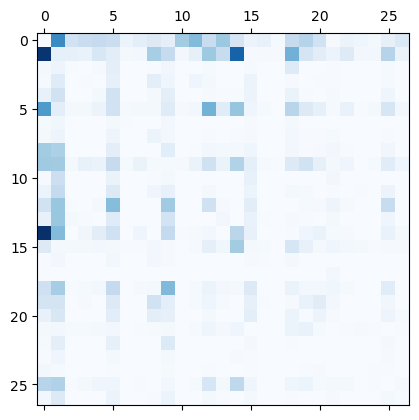

In [3]:
print(N[0])
from matplotlib import pyplot as plt
plt.matshow(N, cmap='Blues')
plt.show()

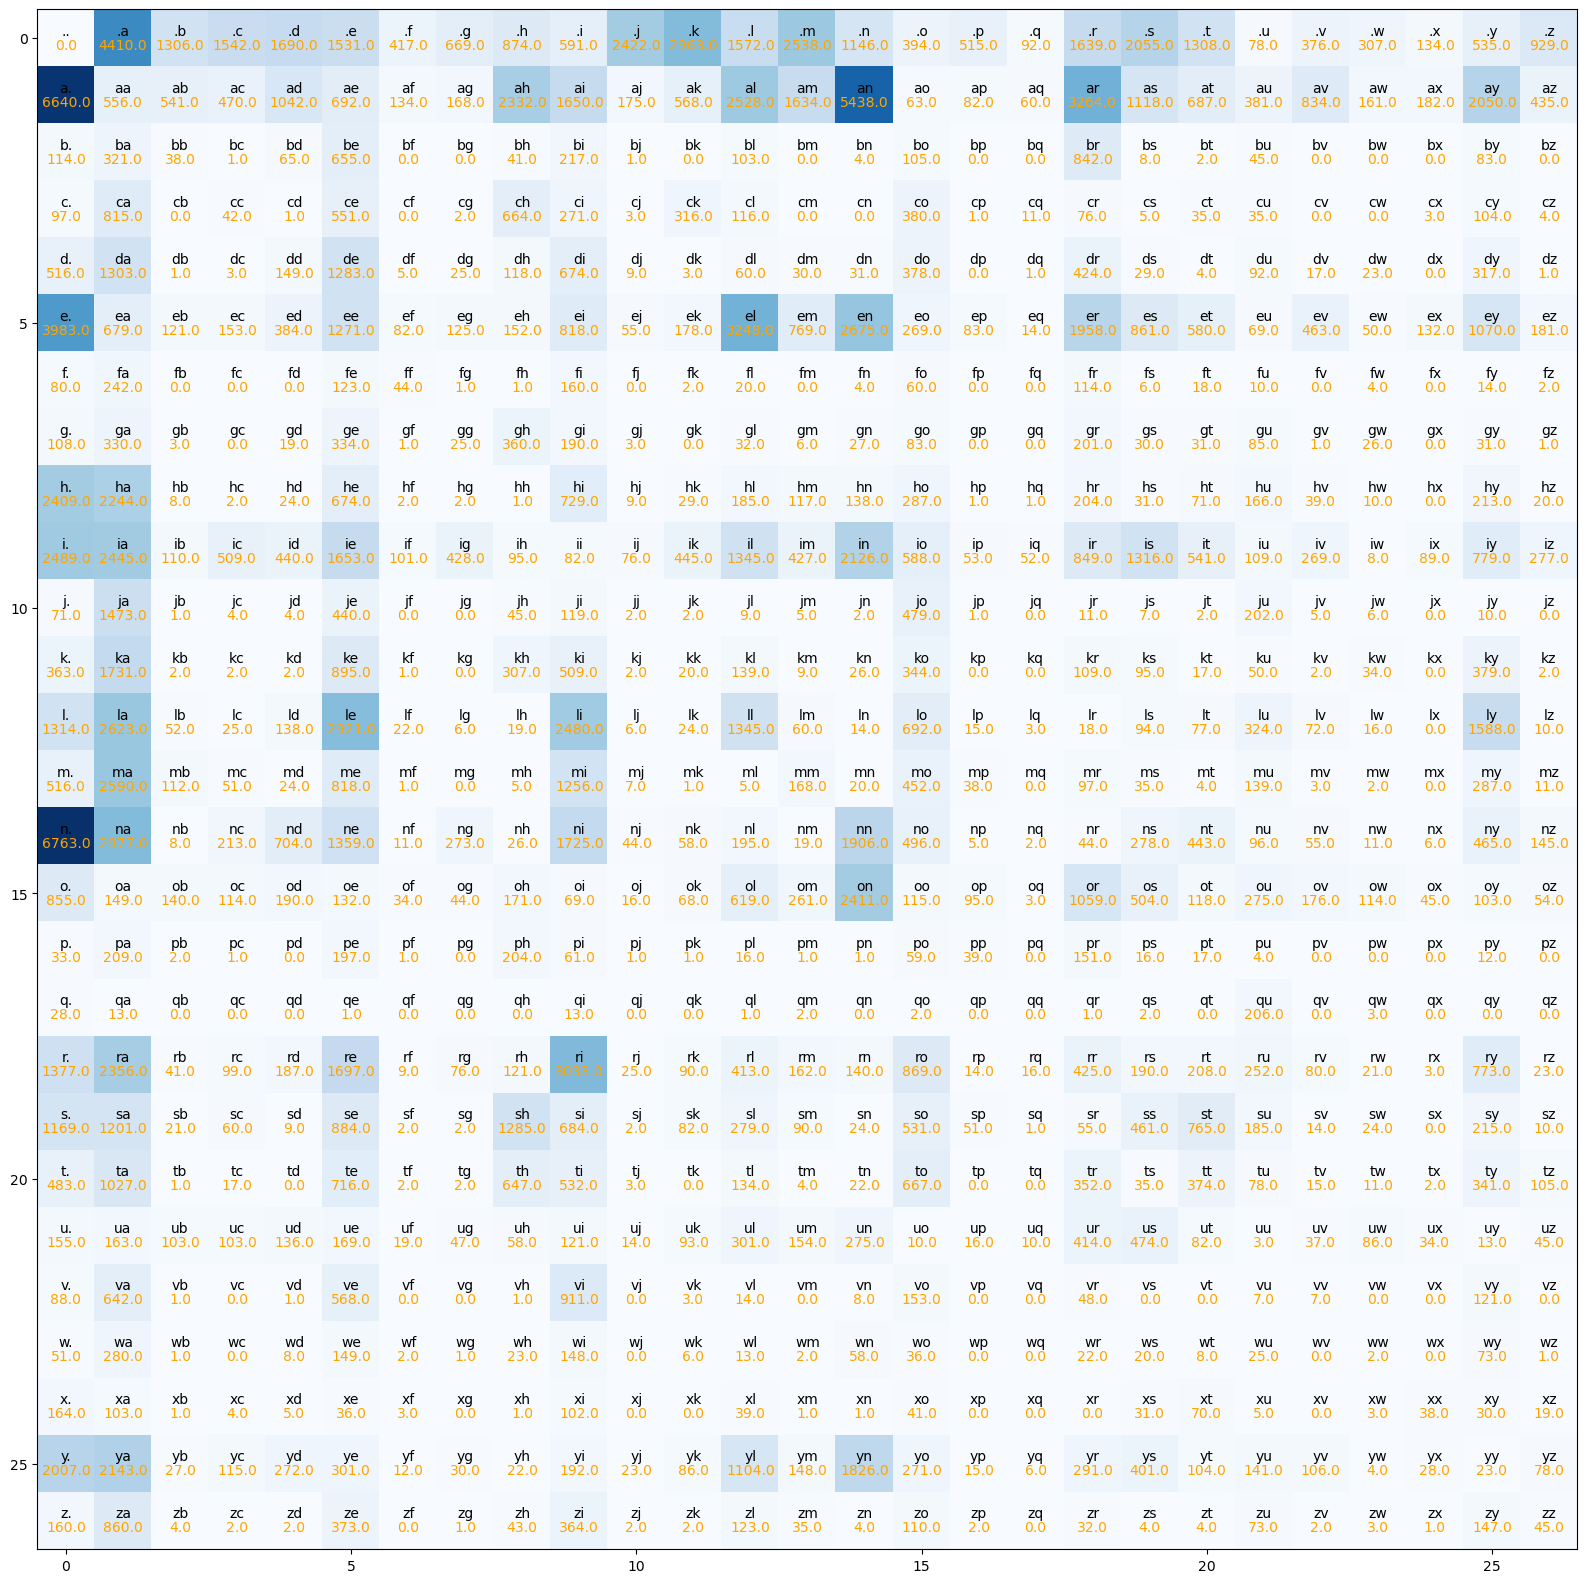

In [4]:
# 画图画的形象一点
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')
for i in range(len(char2idx)):
    for j in range(len(char2idx)):
        plt.text(j, i, idx2char[i] + idx2char[j], ha='center', va='bottom', color='k')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='orange')
        
#plt.axis('off')       
plt.show()


计算概率， 针对每一行，我们可以知道代表的是，以某个字符为起点，比如a为起点， a之后跟着其他字符出现的频率(aa, ab, ac, ...az, a.)，那么我们就可以通过归一化这一行数据，来代表该pair可能出现的概率

In [5]:
P = N / N.sum(dim=1, keepdim=True) # normalize
print(N[0])

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])


我们通过采样方法，每次采样一个字符，不断地采样直到我们遇见.字符代表终止，这样我们就能得到一个序列。

In [6]:

g = torch.Generator().manual_seed(1567891232)
gen_words = []
def sample_word(P, sample_idx, g):
    while True:
        # replacement=True 代表可以重复采样，也就是可以选择相同的字符作为起始字符
        sample_idx = torch.multinomial(P[sample_idx], num_samples=1, replacement=True, generator=g).item()
        
        sample_chars.append(idx2char[sample_idx])
        if sample_idx == 0:
            break
    return ''.join(sample_chars)

# 代表我们要采样 100 哥字符
for i in range(100):
    sample_idx = 0
    sample_chars = []
    # Call the sample_word function to generate characters
    word = sample_word(P, sample_idx, g)
    gen_words.append(word)



print('\n'.join(gen_words))

sshellvyiyen.
men.
d.
faxa.
ianassonchjaush.
amarivi.
reraledoet.
aen.
jan.
iehanashly.
s.
jadhuri.
nox.
sta.
iny.
ria.
steviemahah.
m.
oseitizli.
k.
cykaainimasan.
maliehianite.
yone.
chameevelenan.
amiheouonatshom.
zaillyancar.
ben.
vi.
trenn.
ahalanaryn.
ahreiarvilimalinaka.
m.
tei.
kalox.
nn.
ssytourobreaskaie.
halieliridrin.
vistolakisah.
lawele.
cavauhiyad.
a.
tess.
vash.
fa.
mdyn.
chiylena.
ni.
da.
s.
a.
sss.
seileitali.
lei.
bisu.
hra.
aregheleietedana.
co.
f.
maxmalira.
tindamisely.
areriadton.
nd.
alicana.
melyrenoanda.
dom.
kellena.
tahy.
bracai.
mmushlzaza.
jansialiei.
astan.
janacajossa.
stiylanis.
tinnaron.
men.
janiriynarakestoniahi.
tan.
m.
amin.
eeylex.
khwenghelel.
klimedy.
n.
drorishudeduib.
rn.
ryloulawa.
eelaoferylia.
jonanlelanah.
sh.
llelo.
li.
dat.
leruavigashela.
konadelayo.
n.
kseto.
cahah.
i.
jorythasarkechimaleikyan.
yara.


现在我们可以计算一下一个单词出现的概率， 比如单词abc这个词出现的概率是多少？
用似然函数来计算
p(abc) = p(ab) * p(bc) 

log(pabc) = log(p(ab)) + log(p(bc))

neg_avg_log_prob = -1 * np.mean(log(pabc))

In [7]:
# 我们先看一个单词的概率
w = 'the'
w = '.' + w + '.'
log_prob_sum = 0
n = 0
for ch1, ch2 in zip(w, w[1:]):
    prob = P[char2idx[ch1], char2idx[ch2]]
    log_prob = torch.log(prob).item()
    log_prob_sum += log_prob
    n += 1
    print(f'{ch1} {ch2} {prob:.4f} {log_prob:.4f} {log_prob_sum:.4f}')
neg_avg_log_prob = -log_prob_sum / n
print(neg_avg_log_prob)




. t 0.0408 -3.1983 -3.1983
t h 0.1162 -2.1528 -5.3511
h e 0.0885 -2.4248 -7.7758
e . 0.1950 -1.6346 -9.4105
2.352618634700775


In [8]:
word_nll = {}
for word in words:
    log_prob_sum = 0
    neg_avg_log_prob = 0
    w = '.' + word + '.'
    n = 0
    for ch1, ch2 in zip(w, w[1:]):
        prob = P[char2idx[ch1], char2idx[ch2]]
        log_prob = torch.log(prob).item()
        n+=1
        log_prob_sum += log_prob
        #print(f'{ch1} {ch2} {prob:.4f} {log_prob:.4f} {log_prob_sum:.4f}')
    
    neg_avg_log_prob = -1 * log_prob_sum / n
    word_nll[word] = neg_avg_log_prob
    print(f'word = {word}, {neg_avg_log_prob:.4f}')

word = emma, 2.5138
word = olivia, 2.5016
word = ava, 2.1764
word = isabella, 2.3905
word = sophia, 2.4955
word = charlotte, 2.5292
word = mia, 1.9526
word = amelia, 2.0407
word = harper, 2.8843
word = evelyn, 2.1465
word = abigail, 2.7588
word = emily, 2.3866
word = elizabeth, 2.4188
word = mila, 2.0159
word = ella, 2.1041
word = avery, 2.3209
word = sofia, 2.7111
word = camila, 2.1538
word = aria, 1.8729
word = scarlett, 2.7952
word = victoria, 2.5360
word = madison, 2.0713
word = luna, 2.5317
word = grace, 2.5974
word = chloe, 2.8596
word = penelope, 2.5520
word = layla, 2.1623
word = riley, 2.1797
word = zoey, 3.0501
word = nora, 2.4537
word = lily, 2.2153
word = eleanor, 2.4403
word = hannah, 2.0802
word = lillian, 2.0241
word = addison, 2.3355
word = aubrey, 2.5109
word = ellie, 2.1588
word = stella, 2.0912
word = natalie, 2.3833
word = zoe, 3.0883
word = leah, 2.3619
word = hazel, 2.5402
word = violet, 2.7156
word = aurora, 2.3580
word = savannah, 2.1651
word = audrey, 2.6737
wo

word = masha, 1.9304
word = maylie, 2.0281
word = mckinnley, 2.7134
word = mckinsey, 2.7964
word = meylin, 2.0863
word = miliani, 2.0800
word = naevia, 2.4962
word = nakiyah, 2.4997
word = namya, 2.4115
word = natania, 2.3174
word = neena, 2.3648
word = neyla, 2.3940
word = nirvi, 2.7997
word = oluwatamilore, 2.6455
word = orli, 2.7055
word = paitynn, 2.4954
word = perl, 2.7828
word = prairie, 2.4035
word = quincey, 2.7937
word = quinlee, 2.7529
word = raneem, 2.5285
word = rayleen, 2.1268
word = reba, 2.7706
word = reegan, 2.4928
word = reena, 2.2071
word = renleigh, 2.5438
word = rhilynn, 2.4577
word = rumaysa, 2.5482
word = ryli, 2.3285
word = saanvika, 2.6472
word = sable, 2.5396
word = sabrin, 2.0695
word = sahily, 2.2875
word = salima, 2.1822
word = samora, 2.2434
word = sarena, 2.0698
word = sedra, 2.4688
word = shahad, 2.2223
word = shamira, 2.1074
word = shanell, 2.0978
word = shaniah, 1.9762
word = shaylin, 1.9551
word = solomia, 2.4646
word = storie, 2.0973
word = suhani, 2.

In [13]:
xs = []
ys = []
for w in words[:1]:
    print(w)
    w = '.' + w + '.'
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)
        xs.append(char2idx[ch1])
        ys.append(char2idx[ch2])

print(xs)
print(ys)


emma
. e
e m
m m
m a
a .
[0, 5, 13, 13, 1]
[5, 13, 13, 1, 0]


F.one_hot(xs, num_classes=27).float() 之所以还会调用float，是因为one_hot返回的是int64，而神经网络的输入要求是float32

In [17]:
import torch.nn.functional as F
xs = torch.tensor(xs)
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

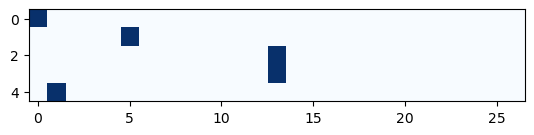

In [19]:
from matplotlib import pyplot as plt
plt.imshow(xenc, cmap='Blues')
plt.show()

In [29]:
g = torch.Generator().manual_seed(1567891232)
W = torch.randn(27,27, generator=g)
xenc @ W

tensor([[ 1.0562,  0.1067,  0.0144, -0.6332,  1.2272,  1.6260, -1.4120, -1.1203,
         -0.0472,  1.2210, -0.2593,  1.7492, -0.5382, -1.6639,  0.2199, -0.1070,
          0.1904,  0.1995,  0.6945,  1.1662,  0.7970, -0.5883,  0.1936, -0.5650,
         -0.2034,  0.4308, -0.6897],
        [-0.4107,  1.0478, -2.5516,  0.7797,  0.4378,  1.8027,  0.2364,  0.5323,
          1.3226,  0.1764,  0.9323,  1.8031, -1.3039, -0.0936,  1.2865, -1.9713,
         -0.0464,  0.0463, -0.4782, -0.2919,  1.1629, -0.7279,  1.9807,  0.6585,
         -1.7021,  0.0781, -1.3606],
        [-0.2920, -0.3601, -0.8068, -1.1424, -2.3206, -1.2461, -1.4335,  0.5518,
          0.7711, -1.0751, -0.7653,  0.6301, -0.1122,  1.0324, -1.3591,  0.6651,
          0.7627,  0.0269, -1.5433,  1.2275,  0.1978,  1.9716, -1.0683,  2.2700,
         -0.2012, -0.0516, -1.3687],
        [-0.2920, -0.3601, -0.8068, -1.1424, -2.3206, -1.2461, -1.4335,  0.5518,
          0.7711, -1.0751, -0.7653,  0.6301, -0.1122,  1.0324, -1.3591,  0.6651

In [30]:
(xenc @ W)[1]

tensor([-0.4107,  1.0478, -2.5516,  0.7797,  0.4378,  1.8027,  0.2364,  0.5323,
         1.3226,  0.1764,  0.9323,  1.8031, -1.3039, -0.0936,  1.2865, -1.9713,
        -0.0464,  0.0463, -0.4782, -0.2919,  1.1629, -0.7279,  1.9807,  0.6585,
        -1.7021,  0.0781, -1.3606])

In [31]:
(xenc @ W)[:,1]

tensor([ 0.1067,  1.0478, -0.3601, -0.3601, -0.7423])

In [32]:
(xenc @ W).exp()

tensor([[2.8753, 1.1126, 1.0145, 0.5309, 3.4116, 5.0837, 0.2437, 0.3262, 0.9539,
         3.3904, 0.7716, 5.7499, 0.5838, 0.1894, 1.2459, 0.8986, 1.2098, 1.2208,
         2.0027, 3.2099, 2.2189, 0.5553, 1.2136, 0.5683, 0.8160, 1.5384, 0.5017],
        [0.6632, 2.8515, 0.0780, 2.1807, 1.5494, 6.0663, 1.2666, 1.7029, 3.7532,
         1.1929, 2.5404, 6.0686, 0.2715, 0.9106, 3.6202, 0.1393, 0.9547, 1.0474,
         0.6199, 0.7469, 3.1991, 0.4829, 7.2481, 1.9319, 0.1823, 1.0812, 0.2565],
        [0.7468, 0.6976, 0.4463, 0.3191, 0.0982, 0.2876, 0.2385, 1.7364, 2.1622,
         0.3413, 0.4652, 1.8777, 0.8938, 2.8078, 0.2569, 1.9448, 2.1440, 1.0272,
         0.2137, 3.4126, 1.2188, 7.1824, 0.3436, 9.6793, 0.8178, 0.9497, 0.2544],
        [0.7468, 0.6976, 0.4463, 0.3191, 0.0982, 0.2876, 0.2385, 1.7364, 2.1622,
         0.3413, 0.4652, 1.8777, 0.8938, 2.8078, 0.2569, 1.9448, 2.1440, 1.0272,
         0.2137, 3.4126, 1.2188, 7.1824, 0.3436, 9.6793, 0.8178, 0.9497, 0.2544],
        [0.3613, 0.4760,

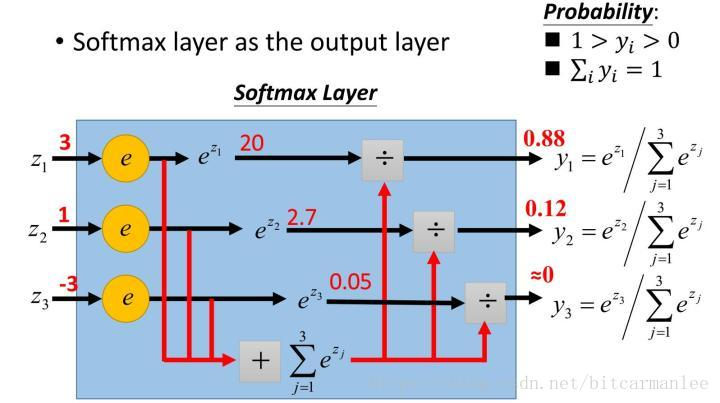

counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)  相当于多分类的SOFTMAX

In [33]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0662, 0.0256, 0.0234, 0.0122, 0.0785, 0.1170, 0.0056, 0.0075, 0.0220,
         0.0781, 0.0178, 0.1324, 0.0134, 0.0044, 0.0287, 0.0207, 0.0279, 0.0281,
         0.0461, 0.0739, 0.0511, 0.0128, 0.0279, 0.0131, 0.0188, 0.0354, 0.0116],
        [0.0126, 0.0542, 0.0015, 0.0415, 0.0295, 0.1153, 0.0241, 0.0324, 0.0713,
         0.0227, 0.0483, 0.1154, 0.0052, 0.0173, 0.0688, 0.0026, 0.0181, 0.0199,
         0.0118, 0.0142, 0.0608, 0.0092, 0.1378, 0.0367, 0.0035, 0.0206, 0.0049],
        [0.0175, 0.0164, 0.0105, 0.0075, 0.0023, 0.0068, 0.0056, 0.0408, 0.0508,
         0.0080, 0.0109, 0.0441, 0.0210, 0.0660, 0.0060, 0.0457, 0.0504, 0.0241,
         0.0050, 0.0802, 0.0286, 0.1687, 0.0081, 0.2274, 0.0192, 0.0223, 0.0060],
        [0.0175, 0.0164, 0.0105, 0.0075, 0.0023, 0.0068, 0.0056, 0.0408, 0.0508,
         0.0080, 0.0109, 0.0441, 0.0210, 0.0660, 0.0060, 0.0457, 0.0504, 0.0241,
         0.0050, 0.0802, 0.0286, 0.1687, 0.0081, 0.2274, 0.0192, 0.0223, 0.0060],
        [0.0133, 0.0175,

In [34]:
probs.shape

torch.Size([5, 27])

In [35]:
probs[0].sum()

tensor(1.0000)

In [46]:
import numpy as np
nlls = torch.zeros(len(xs))
ys = torch.tensor(ys)
for i in range(probs.shape[0]):
    ch = idx2char[xs[i].item()]
    predict_label = idx2char[ys[i].item()]
    
    nll = -torch.log(probs[i, ys[i]]).item()
    nlls[i] = nll
    print(f'ch = {ch}, predict_label = {predict_label}, prob ={probs[i, ys[i]]:.4f}, loss  = {nll:.4f}')

print("============================================================================")

print(f'mean loss = {nlls.mean().item():.4f}')


ch = ., predict_label = e, prob =0.1170, loss  = 2.1453
ch = e, predict_label = m, prob =0.0173, loss  = 4.0565
ch = m, predict_label = m, prob =0.0660, loss  = 2.7186
ch = m, predict_label = a, prob =0.0164, loss  = 4.1111
ch = a, predict_label = ., prob =0.0133, loss  = 4.3208
tensor(3.4704)
mean loss = 3.4704


/tmp/ipykernel_685667/4213232279.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ys = torch.tensor(ys)


In [52]:


g = torch.Generator().manual_seed(1567891232)
W = torch.randn((27,27), generator=g, requires_grad=True)




tensor([[0.0662, 0.0256, 0.0234, 0.0122, 0.0785, 0.1170, 0.0056, 0.0075, 0.0220,
         0.0781, 0.0178, 0.1324, 0.0134, 0.0044, 0.0287, 0.0207, 0.0279, 0.0281,
         0.0461, 0.0739, 0.0511, 0.0128, 0.0279, 0.0131, 0.0188, 0.0354, 0.0116],
        [0.0126, 0.0542, 0.0015, 0.0415, 0.0295, 0.1153, 0.0241, 0.0324, 0.0713,
         0.0227, 0.0483, 0.1154, 0.0052, 0.0173, 0.0688, 0.0026, 0.0181, 0.0199,
         0.0118, 0.0142, 0.0608, 0.0092, 0.1378, 0.0367, 0.0035, 0.0206, 0.0049],
        [0.0175, 0.0164, 0.0105, 0.0075, 0.0023, 0.0068, 0.0056, 0.0408, 0.0508,
         0.0080, 0.0109, 0.0441, 0.0210, 0.0660, 0.0060, 0.0457, 0.0504, 0.0241,
         0.0050, 0.0802, 0.0286, 0.1687, 0.0081, 0.2274, 0.0192, 0.0223, 0.0060],
        [0.0175, 0.0164, 0.0105, 0.0075, 0.0023, 0.0068, 0.0056, 0.0408, 0.0508,
         0.0080, 0.0109, 0.0441, 0.0210, 0.0660, 0.0060, 0.0457, 0.0504, 0.0241,
         0.0050, 0.0802, 0.0286, 0.1687, 0.0081, 0.2274, 0.0192, 0.0223, 0.0060],
        [0.0133, 0.0175,

In [ ]:
ys = torch.tensor(ys)
num = len(xs)
for step in range(2000):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    probs
    import numpy as np
    predict = probs[torch.arange(num),ys]

    nll =-predict.log().mean()
    print(f'loss = {nll.item()}')

    W.grad = None
    nll.backward()

    W.data -= W.grad * 1


/tmp/ipykernel_685667/4274117558.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ys = torch.tensor(ys)


loss = 0.2798798680305481
loss = 0.2798783779144287
loss = 0.2798769176006317
loss = 0.2798755168914795
loss = 0.2798740565776825
loss = 0.27987250685691833
loss = 0.27987101674079895
loss = 0.2798696756362915
loss = 0.27986809611320496
loss = 0.27986666560173035
loss = 0.27986520528793335
loss = 0.27986380457878113
loss = 0.27986234426498413
loss = 0.2798609435558319
loss = 0.2798594832420349
loss = 0.2798580229282379
loss = 0.2798566222190857
loss = 0.2798551023006439
loss = 0.2798536419868469
loss = 0.2798522412776947
loss = 0.27985087037086487
loss = 0.2798493802547455
loss = 0.2798479199409485
loss = 0.2798464894294739
loss = 0.27984505891799927
loss = 0.27984362840652466
loss = 0.27984219789505005
loss = 0.2798407971858978
loss = 0.27983930706977844
loss = 0.27983787655830383
loss = 0.2798365354537964
loss = 0.2798350751399994
loss = 0.2798336446285248
loss = 0.2798321843147278
loss = 0.27983078360557556
loss = 0.2798294425010681
loss = 0.2798279821872711
loss = 0.279826611280441